<a href="https://colab.research.google.com/github/ThiagoVisentimLopes/DataScience/blob/master/TCC02_Novo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   PearsonCorrelation (OK)
*   Heatmap(OK)
*   Regressão linear com SVR(OK)
*   Regressão com SVR não linear(OK)
*   MLP: Regressão. (OK)
*   Rede neural recorrente RNN.(OK)


https://matheusfacure.github.io/2017/09/12/rnn/

https://github.com/ageron/handson-ml2/blob/master/15_processing_sequences_using_rnns_and_cnns.ipynb

## Anotações para projetos Futuros

 Alguns itens que precisam ser trabalhados:


1.   Na coluna "CFOP", precisamos pegar apenas o primeiro dígito da string, Exemplo: o CFOP 6056 irá virar 6.
2.   Na coluna "SITUA. NF.", as situações precisam ser transformadas como foi feito com a coluna "TIPO DE USO".
3.   Precisamos fazer plots com "CFOP"
4.   Precisamos fazer plots combinando "SITUA. NF."



10.   Precisamos fazer plots combinando "DESTINO" (se sobrar tempo), a idéia é:
*   compreender quem são os clientes que mais compram.
*   quais itens estão comprando.
*   As vendas estão sendo para dentro,fora do estado ou para o exterior.(Para esse plot precisamos combinar a CFOP).










### Consideração importantes sobre alguns campos:


* **KEY**: É composto por, Empresa, Série e Número do pedido, separados por ';'
* **PRECO UNIT.**: Preço unitário do item, por quanto foi vendido.
* **PRECO CUSTO**: Preço de custo do item, por quanto foi comprado do fornecedor.

---

* **CFOP**(Segundo o site do Sefaz):

*ENTRADA*

1.000 – ENTRADA E/OU AQUISIÇÕES DE SERVIÇOS DO ESTADO  

2.000 – ENTRADA E/OU AQUISIÇÕES DE SERVIÇOS DE OUTROS ESTADOS

3.000 – ENTRADA E/OU AQUISIÇÕES DE SERVIÇOS DO EXTERIOR

*SAÍDAS*      
                                                                      5.000 - SAÍDAS OU PRESTAÇÕES DE SERVIÇOS PARA O ESTADO

6.000 - SAÍDAS OU PRESTAÇÕES DE SERVIÇOS PARA OUTROS ESTADOS

7.000 - SAÍDAS OU PRESTAÇÕES DE SERVIÇOS PARA O EXTERIOR









## Importação de bibliotecas e carregamento dos dados #1

In [ ]:
# Importações básicas
import numpy as np
import pandas as pd

# Geração de gráficos
import seaborn as sns
import matplotlib.pyplot as plt


# Importações para o processamento
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from pandas.plotting import register_matplotlib_converters
from scipy.stats import pearsonr
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Etapa 1 - Realizaremos a primeira etapa do Processo KDD, onde será realizado:

*   Leitura do DataFrame com todas as variavéis e amostras brutas.
*   Seleção das variáveis que desejamos e criação de DataFrames menores (facilitando assim a manipulação e visualização).



In [ ]:
# Carregar o dataset

from google.colab import drive
drive.mount('/content/drive')
grossDF = pd.read_csv('/content/drive/My Drive/TCC/BaseRotulada.csv')

Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (54,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#KEY é composto por, Empresa, Série e Número do pedido, separados por ';'

grossDF = grossDF[['KEY', 'DATA EMISSAO', 'CÓD. MAT','QTD.','PRECO UNIT.','PRECO CUSTO','TOTAL DO ITEM','CFOP','SITUA. NF.','DESTINO','VENDEDOR','TIPO DE USO']]

In [ ]:
# Método para transformar strings em numéricos

#Situação da NF
grossDF = grossDF.replace(to_replace=["Emitida"],
           value="1")
grossDF = grossDF.replace(to_replace=["Cancelada"],
           value="2")
grossDF = grossDF.replace(to_replace=["Pendente"],
           value="3")

#Tipo de uso
grossDF = grossDF.replace(to_replace=["Consumo"],
           value="1")
grossDF = grossDF.replace(to_replace=["Industrialização"],
           value="2")
grossDF = grossDF.replace(to_replace=["Revenda"],
           value="3")

In [ ]:
# Exibição do dataset
grossDF

,KEY,DATA EMISSAO,CÓD. MAT,QTD.,PRECO UNIT.,PRECO CUSTO,TOTAL DO ITEM,CFOP,SITUA. NF.,DESTINO,VENDEDOR,TIPO DE USO
0,1;1;12718,03/10/2017,2240,1.0,1010.00,251.0,1010.00,510106.0,1,6056,1627,1
1,1;1;12718,03/10/2017,2248,1.0,1800.00,397.0,1800.00,510106.0,1,6056,1627,1
2,1;1;12719,03/10/2017,2274,3.0,300.00,448.0,900.00,590101.0,1,2025,0,2
3,1;1;12719,03/10/2017,2291,1.0,300.00,280.0,300.00,590101.0,1,2025,0,2
4,1;1;12719,03/10/2017,5420,2.0,300.00,401.0,600.00,590101.0,1,2025,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
41355,4;1;3837,14/04/2022,218,2.0,500.00,54.0,1000.00,590101.0,1,2025,1252,2
41356,4;1;3838,14/04/2022,3276,3.0,26000.00,0.0,78000.00,610130.0,1,7465,1244,1
41357,4;1;3839,14/04/2022,3276,2.0,26000.00,0.0,52000.00,610130.0,1,7465,1244,1
41358,4;1;3840,18/04/2022,3276,1.0,26000.00,0.0,26000.00,610130.0,1,7465,1244,1


In [ ]:
#sns.pairplot(grossDF,hue='TIPO DE USO',palette='bwr')

In [ ]:
# Removendo as situações Cancelada e Pendente da NF do dataset.
grossDF.drop(grossDF[grossDF['SITUA. NF.'] == '2'].index, inplace=True)
grossDF.drop(grossDF[grossDF['SITUA. NF.'] == '3'].index, inplace=True)

## Plots do DataFrame Bruto de dado

In [ ]:
#Exibindo a quantidade de dados dentro do "TIPO DE USO"

grossDF['TIPO DE USO'].value_counts()

1    30085
2     7883
3     2340
Name: TIPO DE USO, dtype: int64

In [ ]:
#Exibindo a quantidade de dados dentro da "SITUA. NF."

grossDF['SITUA. NF.'].value_counts()

1    40308
Name: SITUA. NF., dtype: int64

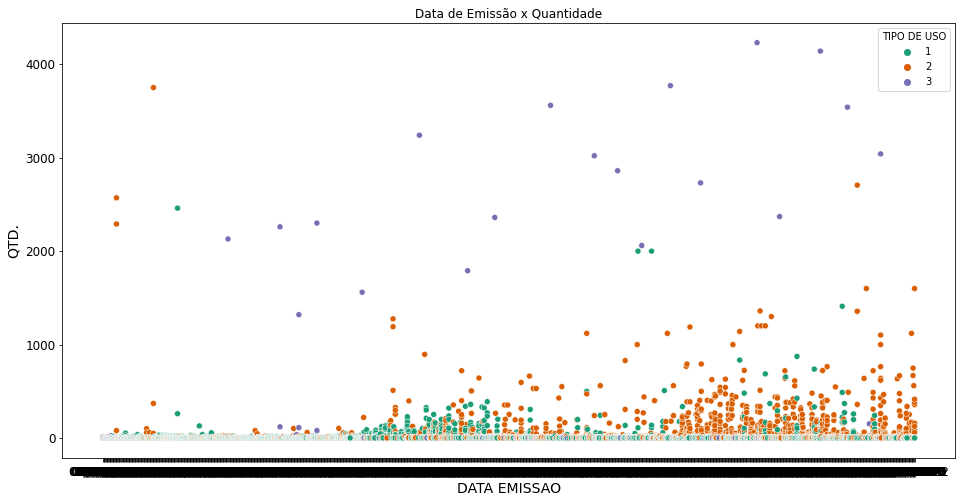

In [ ]:
# Gráfico de Data de Emissão x Quantidade com relação ao Tipo de Uso

plt.figure(figsize=(16,8))
plt.title('Data de Emissão x Quantidade')
sns.scatterplot(x='DATA EMISSAO', y='QTD.',hue='Tipo de uso',data=grossDF,palette='Dark2')
plt.show()

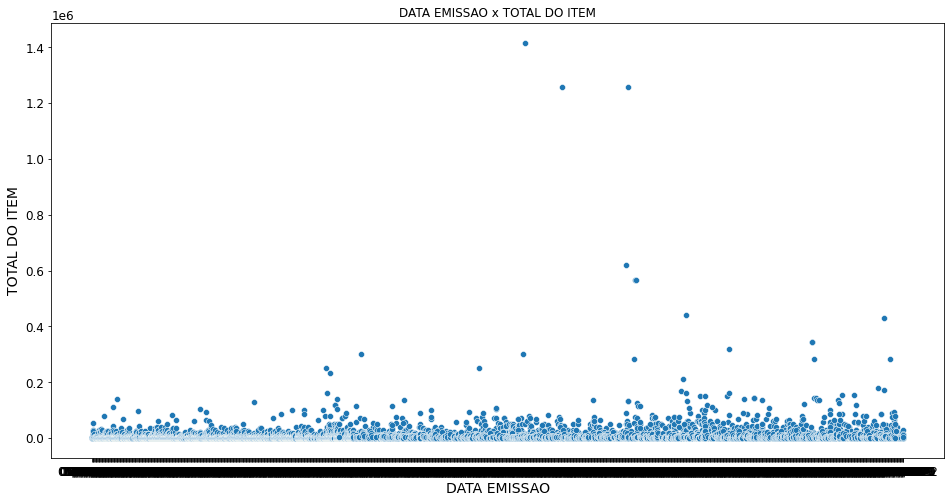

In [ ]:
# Gráfico de Data de Emissão x Total do Item em relação ao Tipo de Uso

plt.figure(figsize=(16,8))
plt.title('DATA EMISSAO x TOTAL DO ITEM')
sns.scatterplot(x='DATA EMISSAO', y='TOTAL DO ITEM',data=grossDF,palette='Dark2')
plt.show()

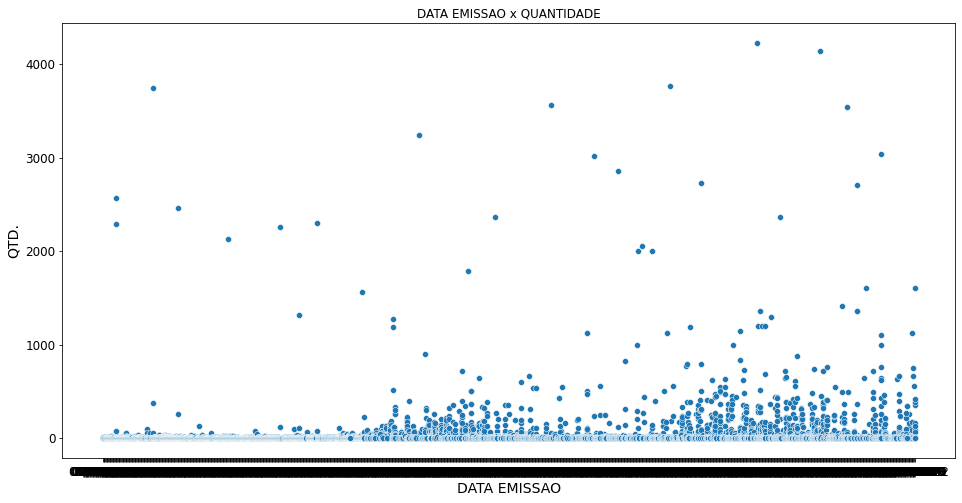

In [ ]:
# Gráfico de Data de Emissão x Quantidade

plt.figure(figsize=(16,8))
plt.title('DATA EMISSAO x QUANTIDADE')
sns.scatterplot(x='DATA EMISSAO', y='QTD.',data=grossDF,palette='Dark2')
plt.show()

## Manipulação de dados nos DataFrames #2

In [ ]:
# Conversões de data para formato datetime

grossDF['DATA EMISSAO'] =  pd.to_datetime(grossDF['DATA EMISSAO'], format='%d/%m/%Y')

In [ ]:
mainDF = grossDF[['CÓD. MAT','DATA EMISSAO','QTD.','PRECO UNIT.','PRECO CUSTO','TOTAL DO ITEM']]

In [ ]:
# Aqui trabalharemos com um DataFrame com apenas um item, para isso usaremos como critério de escolha o item com maior frequência.

mainDF['CÓD. MAT'].value_counts()

# Item com maior frequência aparece no topo da lista

3963    633
2180    629
5403    591
5241    578
5242    575
       ... 
2298      1
7545      1
7544      1
5902      1
9980      1
Name: CÓD. MAT, Length: 3021, dtype: int64

In [ ]:
# Pegamos o item no topo da lista

item = mainDF['CÓD. MAT'].value_counts().index.tolist()[0]

In [ ]:
itemDF = mainDF[(mainDF['CÓD. MAT'] == item)].reset_index()

In [ ]:
itemDF

,index,CÓD. MAT,DATA EMISSAO,QTD.,PRECO UNIT.,PRECO CUSTO,TOTAL DO ITEM
0,88,3963,2017-10-18,1.0,55.00,11.000,55.00
1,120,3963,2017-10-19,1.0,50.60,11.000,50.60
2,150,3963,2017-10-19,2.0,55.00,11.000,110.00
3,211,3963,2017-10-25,1.0,52.25,11.000,52.25
4,311,3963,2017-11-07,1.0,42.00,11.000,42.00
...,...,...,...,...,...,...,...
628,34978,3963,2020-01-15,1.0,52.29,6.521,52.29
629,35139,3963,2020-02-04,8.0,1.00,6.521,8.00
630,35168,3963,2020-02-05,4.0,1.00,6.521,4.00
631,35187,3963,2020-02-05,10.0,1.00,6.521,10.00


In [ ]:
# Exibição do início e fim das datas do dataset

print(mainDF['DATA EMISSAO'].min())
print(mainDF['DATA EMISSAO'].max())

2017-10-03 00:00:00
2022-04-19 00:00:00


# Agrupando as datas em períodos de 1 mês #3

In [ ]:
mainDF = mainDF.groupby(pd.Grouper(key='DATA EMISSAO', freq='1M'), dropna=True).sum().reset_index()

In [ ]:
itemDF =itemDF.groupby(pd.Grouper(key='DATA EMISSAO', freq='1M'), dropna=True).sum().reset_index()

In [ ]:
itemDF = itemDF.drop(columns=['CÓD. MAT','PRECO UNIT.','PRECO CUSTO'], axis=1)

In [ ]:
mainDF['CÓD. MAT'].value_counts()

1051932    1
9420996    1
2298922    1
2971661    1
2260155    1
2504079    1
2767751    1
2296933    1
2431036    1
4200200    1
2095175    1
2795245    1
7354277    1
4782395    1
6514768    1
3884680    1
3752136    1
2909255    1
4254295    1
4522776    1
3276691    1
3430173    1
2305918    1
2070169    1
6515454    1
6080214    1
8853821    1
2583188    1
2441014    1
1749653    1
1537394    1
929380     1
6043685    1
8422931    1
2127760    1
2121346    1
2841270    1
2545956    1
2107510    1
1531709    1
1423068    1
2056580    1
2517209    1
998357     1
4619518    1
6574490    1
3225585    1
3198826    1
1765521    1
2902478    1
2451262    1
2967575    1
2814944    1
2713333    1
2806342    1
Name: CÓD. MAT, dtype: int64

In [ ]:
#plt.figure(figsize=(16,8))
#plt.title('DATA EMISSAO x TOTAL DO ITEM')
#sns.scatterplot(x='data', y='valorTotal',data=mainDF,palette='Dark2')
#plt.show()

**Transformamos o campo de data para um formato em que o Machine Learning possa entender.**

In [ ]:
itemDF['DATA EMISSAO']=itemDF['DATA EMISSAO'].map(dt.datetime.toordinal)
mainDF['DATA EMISSAO']=mainDF['DATA EMISSAO'].map(dt.datetime.toordinal)

# Correlações da biblioteca Numpy e correlações de Pearson, da biblioteca sciPy

In [ ]:
mainDF.corr()

,DATA EMISSAO,CÓD. MAT,QTD.,PRECO UNIT.,PRECO CUSTO,TOTAL DO ITEM
DATA EMISSAO,1.000000,0.271790,0.686014,0.455838,0.513886,0.571513
CÓD. MAT,0.271790,1.000000,0.488103,0.828348,0.444041,0.722065
QTD.,0.686014,0.488103,1.000000,0.495553,0.393520,0.533530
PRECO UNIT.,0.455838,0.828348,0.495553,1.000000,0.502387,0.892956
PRECO CUSTO,0.513886,0.444041,0.393520,0.502387,1.000000,0.545870
TOTAL DO ITEM,0.571513,0.722065,0.533530,0.892956,0.545870,1.000000


In [ ]:
itemDF.corr()

,DATA EMISSAO,index,QTD.,TOTAL DO ITEM
DATA EMISSAO,1.000000,0.468530,0.188637,0.203555
index,0.468530,1.000000,0.739680,0.766476
QTD.,0.188637,0.739680,1.000000,0.915938
TOTAL DO ITEM,0.203555,0.766476,0.915938,1.000000


In [ ]:
pearsonr(mainDF['DATA EMISSAO'],mainDF['QTD.'])

(0.6860142032634005, 7.462338048277936e-09)

In [ ]:
pearsonr(itemDF['DATA EMISSAO'],itemDF['QTD.'])

(0.18863707114971628, 0.1678159185534159)

# Exibindo Correlações

In [ ]:
#sns.pairplot(itemDF)

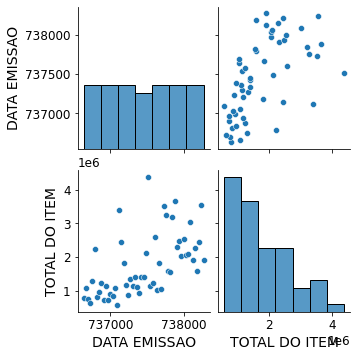

In [ ]:
sns.pairplot(mainDF[['DATA EMISSAO', 'TOTAL DO ITEM']])

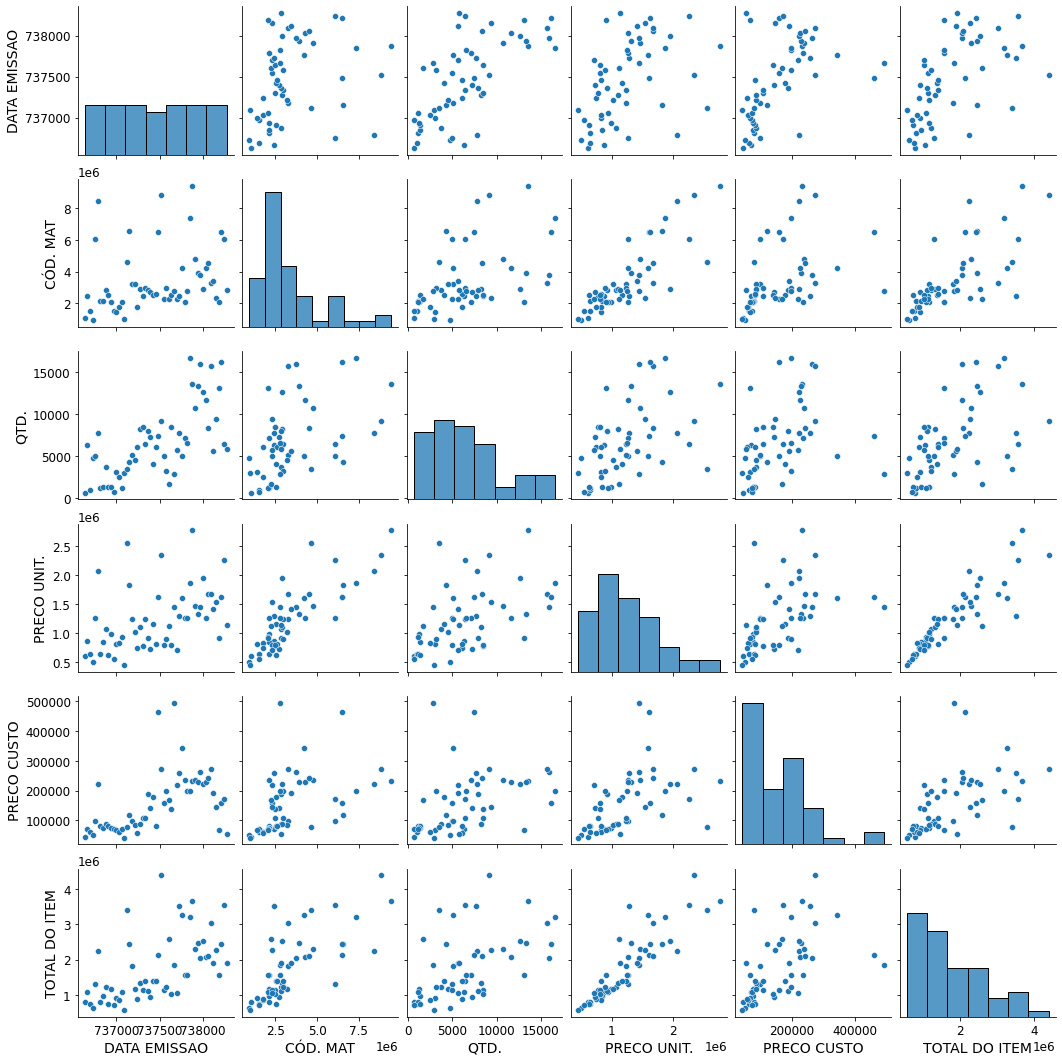

In [ ]:
sns.pairplot(mainDF)

# HeatMap e plots para visualização e entendimento

In [ ]:
#DF2 = mainDF.pivot("DATA EMISSAO", "TOTAL DO ITEM")

Text(0.5, 1.0, 'Correlações')

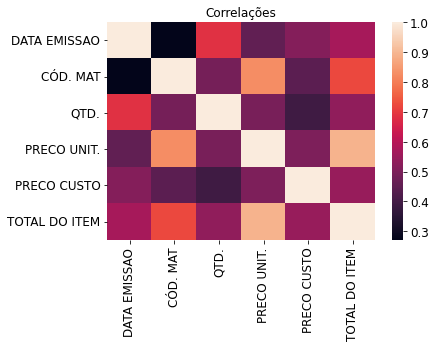

In [ ]:
sns.heatmap(mainDF.corr())
plt.title('Correlações')

Text(0.5, 1.0, 'Correlações')

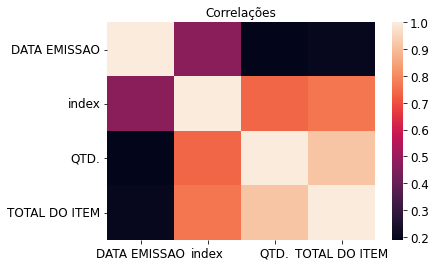

In [ ]:
sns.heatmap(itemDF.corr())
plt.title('Correlações')

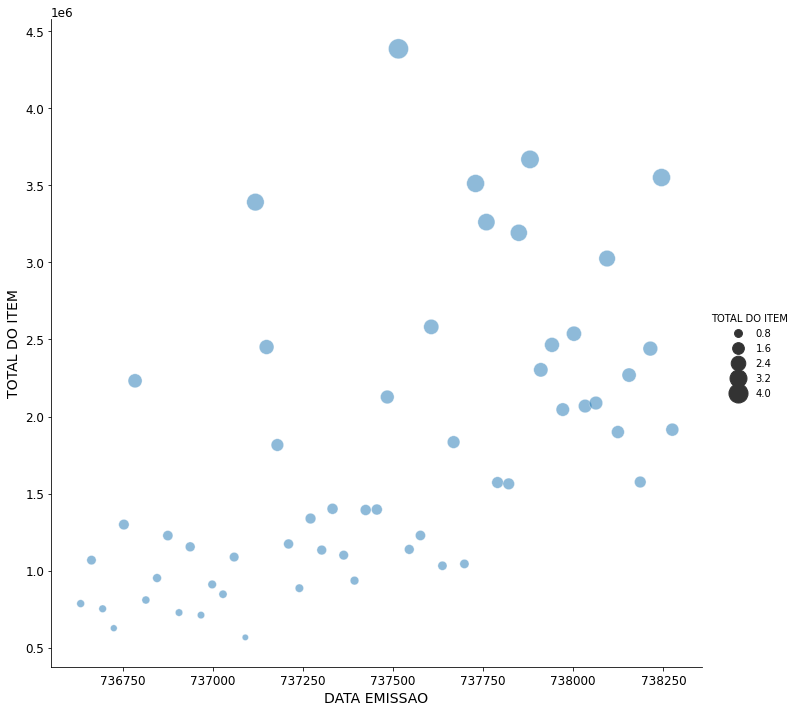

In [ ]:
sns.relplot(x="DATA EMISSAO", y="TOTAL DO ITEM", size="TOTAL DO ITEM",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=10, data=mainDF)

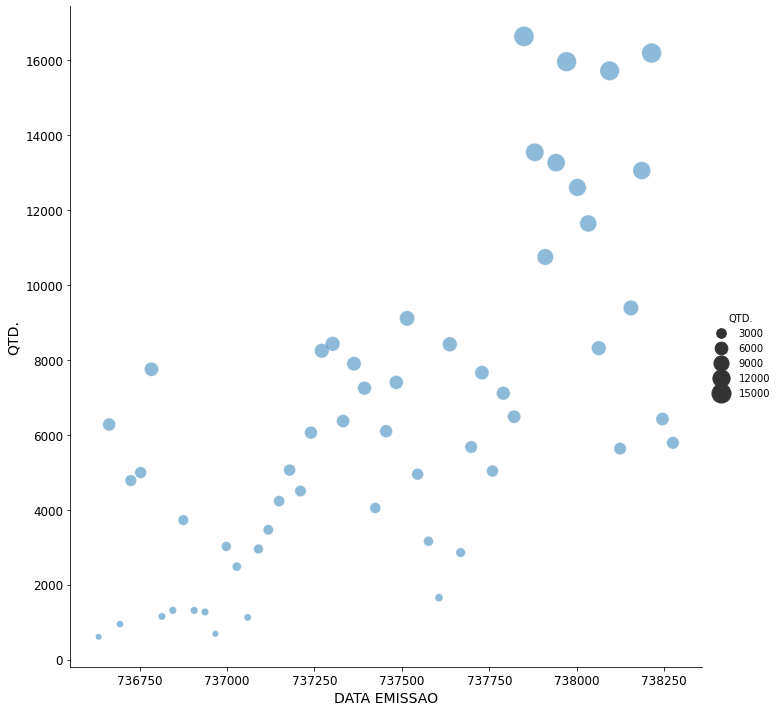

In [ ]:
sns.relplot(x="DATA EMISSAO", y="QTD.", size="QTD.",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=10, data=mainDF)

In [ ]:
itemDF.head(10)

,DATA EMISSAO,index,QTD.,TOTAL DO ITEM
0,736633,569,5.0,267.85
1,736663,5561,11.0,518.30
2,736694,5182,6.0,265.25
3,736725,1326,2.0,78.00
4,736753,74993,64.0,3197.22
5,736784,163683,50.0,2649.44
6,736814,57824,17.0,911.61
7,736845,52809,11.0,588.35
8,736875,90077,18.0,948.49
9,736906,98472,14.0,708.30


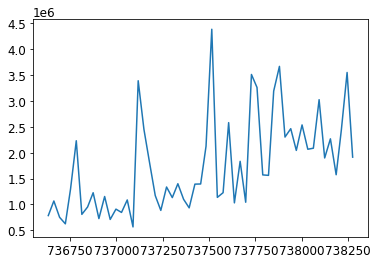

In [ ]:
fig, ax = plt.subplots()
ax.plot(mainDF['DATA EMISSAO'], mainDF['TOTAL DO ITEM'])

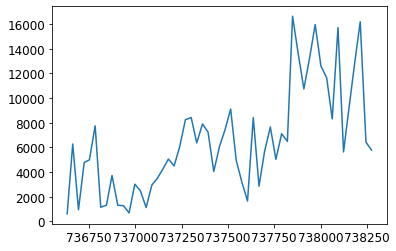

In [ ]:
fig, ax = plt.subplots()
ax.plot(mainDF['DATA EMISSAO'], mainDF['QTD.'])

In [ ]:
mainDF['DATA EMISSAO'].min()

736633

In [ ]:
mainDF.drop(mainDF[mainDF['DATA EMISSAO'] < 700000].index, inplace=True)

In [ ]:
mainDF

,DATA EMISSAO,CÓD. MAT,QTD.,PRECO UNIT.,PRECO CUSTO,TOTAL DO ITEM
0,736633,1051932,607.500,5.987953e+05,42689.2121,785788.18
1,736663,2441014,6275.460,8.643111e+05,70630.4878,1067768.76
2,736694,1537394,945.760,6.423405e+05,62125.2240,752186.82
3,736725,929380,4778.270,4.901590e+05,51490.7363,626293.36
4,736753,6043685,4992.490,1.263174e+06,98642.9877,1298639.02
5,736784,8422931,7749.760,2.061673e+06,221966.3788,2231826.23
6,736814,2127760,1150.680,6.332400e+05,80250.6090,809090.50
7,736845,2121346,1313.220,8.343559e+05,75207.4973,951616.54
8,736875,2841270,3722.613,1.059487e+06,87273.3249,1227219.44
9,736906,2545956,1311.420,6.193133e+05,81397.9008,727532.75


Data de emissão x Total das vendas

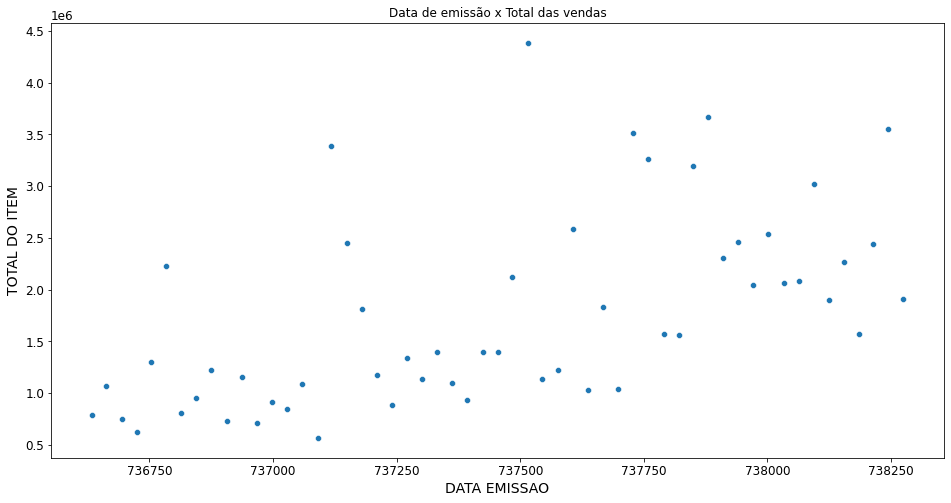

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data de emissão x Total das vendas')
sns.scatterplot(x='DATA EMISSAO', y='TOTAL DO ITEM',data=mainDF,palette='Dark2')
plt.show()

Data de emissão x Quantidade de vendas

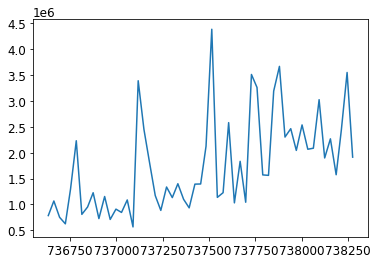

In [ ]:
fig, ax = plt.subplots()
ax.plot(mainDF['DATA EMISSAO'], mainDF['TOTAL DO ITEM'])

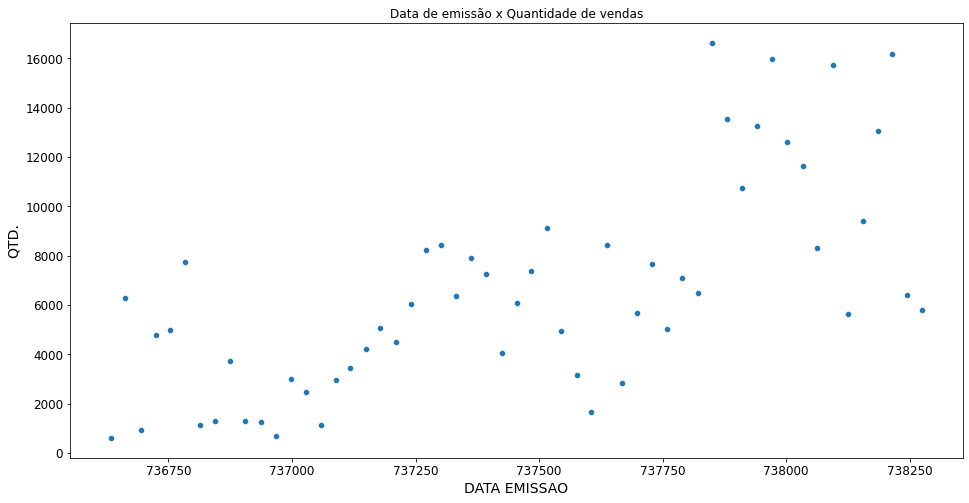

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data de emissão x Quantidade de vendas')
sns.scatterplot(x='DATA EMISSAO', y='QTD.',data=mainDF,palette='Dark2')
plt.show()

In [ ]:
#mainDF.drop(mainDF[mainDF['TOTAL DO ITEM'] > 200000].index, inplace=True)

DATA EMISSAO x TOTAL DO ITEM (item)

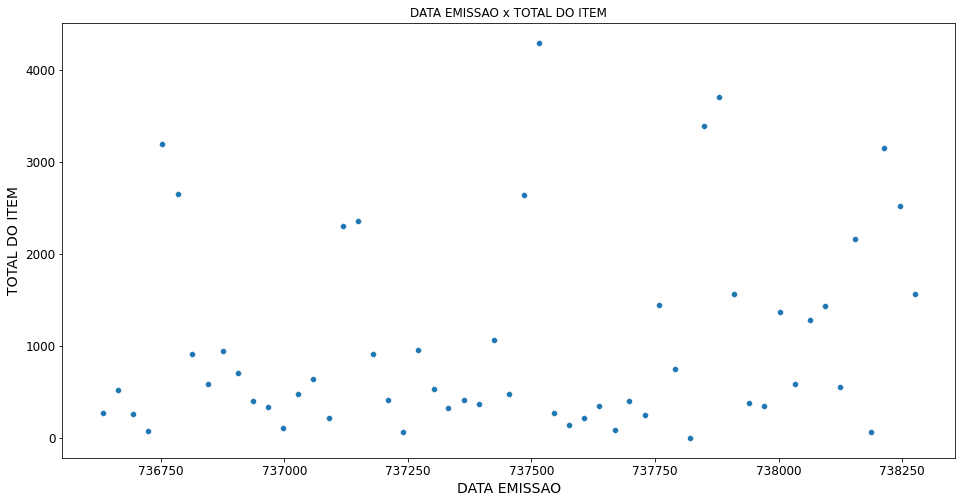

In [ ]:
plt.figure(figsize=(16,8))
plt.title('DATA EMISSAO x TOTAL DO ITEM')
sns.scatterplot(x='DATA EMISSAO', y='TOTAL DO ITEM',data=itemDF,palette='Dark2')
plt.show()

Data emissão x Quantidade (Item)

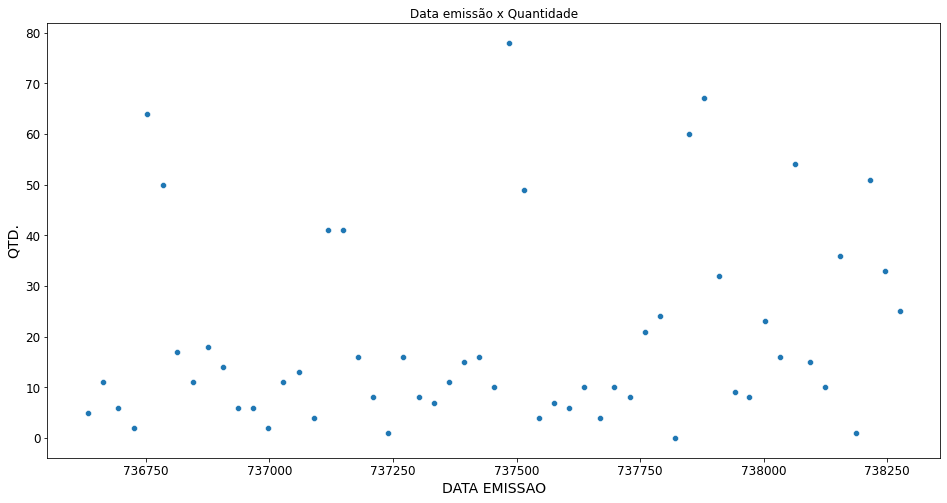

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Data emissão x Quantidade')
sns.scatterplot(x='DATA EMISSAO', y='QTD.',data=itemDF,palette='Dark2')
plt.show()

In [ ]:
#itemDF.drop(itemDF[itemDF['TOTAL DO ITEM'] > 8000].index, inplace=True)

DATA EMISSAO	index	QTD.	TOTAL DO ITEM

In [ ]:
itemDF = itemDF.drop(columns=['index'], axis=1)

Plot após normalizar

PearsonCorrelation, Heatmap, Regressão linear com SVR e outra não linear com SVR.

MLP: Regressão.

Rede neural recorrente.

https://matheusfacure.github.io/2017/09/12/rnn/

https://github.com/ageron/handson-ml2/blob/master/15_processing_sequences_using_rnns_and_cnns.ipynb

# Normalização, renomeação de variáveis e funções de plot #4

In [ ]:
mainDF = mainDF[['DATA EMISSAO','TOTAL DO ITEM']]
mainDF.rename(columns={'DATA EMISSAO':'data','TOTAL DO ITEM':'valorTotal'},inplace=True)
nLinhas = mainDF['data'].count()
novaData = np.arange(0,nLinhas)
mainDF['novaData'] = novaData.tolist()
mainDF.drop(columns=['data'],inplace=True)
mainDF.rename(columns={"novaData":"data"},inplace=True)

escala = StandardScaler()
mainDF = pd.DataFrame(escala.fit_transform(mainDF),columns = mainDF.columns)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# normalize the dataset
#scaler = MinMaxScaler(feature_range=(0, 1))
#mainDF = scaler.fit_transform(mainDF)
#mainDF = pd.DataFrame(mainDF)
#mainDF.rename(columns={0:'data',1:'valorTotal'},inplace=True)

# Regressão linear com SVM Regression

https://towardsdatascience.com/how-to-split-data-into-three-sets-train-validation-and-test-and-why-e50d22d3e54c

In [ ]:
mainDF.tail()

,valorTotal,data
50,0.561973,1.448864
51,-0.195920,1.511858
52,0.749708,1.574852
53,1.962152,1.637846
54,0.175162,1.700840


**SVR prevendo 1 Mês a frente com dados reais dados a ele.**

**O objetivo aqui é ir dando mês por mês da nossa base de dados real (Dados corretos) para o algoritmos treinar e pedimos pra prever 1 mês a frente, e assim vamos guardandos os valores previstos até o ultimo mês que temos informações.**

In [ ]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size = 0.65
valid_size=0.0

train_index = int(len(mainDF)*train_size)

# First we need to sort the dataset by the desired column
mainDF.sort_values(by = 'data', ascending=True, inplace=True)

df_train = mainDF[0:train_index]
df_rem = mainDF[train_index:]

valid_index = int(len(mainDF)*valid_size)

df_valid = mainDF[train_index:train_index+valid_index]
df_test = mainDF[train_index+valid_index:]

X_train, y_train = df_train['data'].copy(), df_train['valorTotal'].copy()
X_valid, y_valid = df_valid['data'].copy(), df_valid['valorTotal'].copy()
X_test, y_test = df_test['data'].copy(), df_test['valorTotal'].copy()

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(35,)
(35,)
(0,)
(0,)
(20,)
(20,)


(None, None)

In [ ]:
y = mainDF['valorTotal']
x = mainDF['data']
#Grava o X_test para printar no grafico!
X = X_test
XtreinoSVR = X_train
YtreinoSVR = y_train

contador = 0
yNewPredictsSVR = np.array([])
tamanhoFinal = len(X_test)
y_pred = ''

In [ ]:
X_test

35    0.503953
36    0.566947
37    0.629941
38    0.692935
39    0.755929
40    0.818923
41    0.881917
42    0.944911
43    1.007905
44    1.070899
45    1.133893
46    1.196887
47    1.259882
48    1.322876
49    1.385870
50    1.448864
51    1.511858
52    1.574852
53    1.637846
54    1.700840
Name: data, dtype: float64

In [ ]:
X_test[contador:contador+3]

35    0.503953
36    0.566947
37    0.629941
Name: data, dtype: float64

In [ ]:
tamanhoFinal

20

In [ ]:
while(contador < tamanhoFinal):
    #pegar de 4 em 4 amostras de teste.
    testar = X_test[contador:contador+1]


    regressor_SVR = SVR(C = 10)
    regressor_SVR.fit(np.array(X_train).reshape(-1, 1), y_train)
    predict_SVR = regressor_SVR.predict(np.array(testar).reshape(-1, 1))

    yNewPredictsSVR = np.concatenate((yNewPredictsSVR, predict_SVR), axis=0)

    novas = len(X_train) + 1

    X_train = x[:novas]
    y_train = y[:novas]

    contador = contador+1


In [ ]:
len(yNewPredictsSVR)

20

In [ ]:
len(y_test)

20

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, yNewPredictsSVR)

-1.0450034910843353

SMAPE- Métrica

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, yNewPredictsSVR)

1.48044750256854

In [ ]:
y_test = np.array(y_test)

https://www.geeksforgeeks.org/how-to-calculate-smape-in-python/

In [ ]:
# Define the function to return the SMAPE value
def calculate_smape(actual, predicted) -> float:

    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)

    return round(
        np.mean(
            np.abs(predicted - actual) /
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
# Get SMAPE for pandas series as parameters
calculate_smape(y_test, yNewPredictsSVR)

122.3

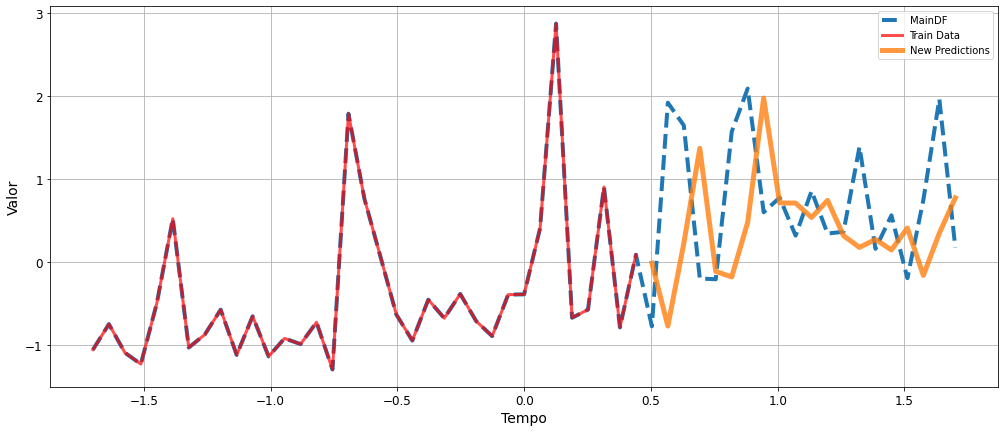

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(mainDF['data'], mainDF['valorTotal'], '--', label="MainDF",linewidth=4.0)
plt.plot(XtreinoSVR, YtreinoSVR, 'r-', label="Train Data",linewidth=3.0,alpha=0.7)
plt.plot(X, yNewPredictsSVR, '-', label="New Predictions",linewidth=5.0,alpha=0.8)
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend(loc='best')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


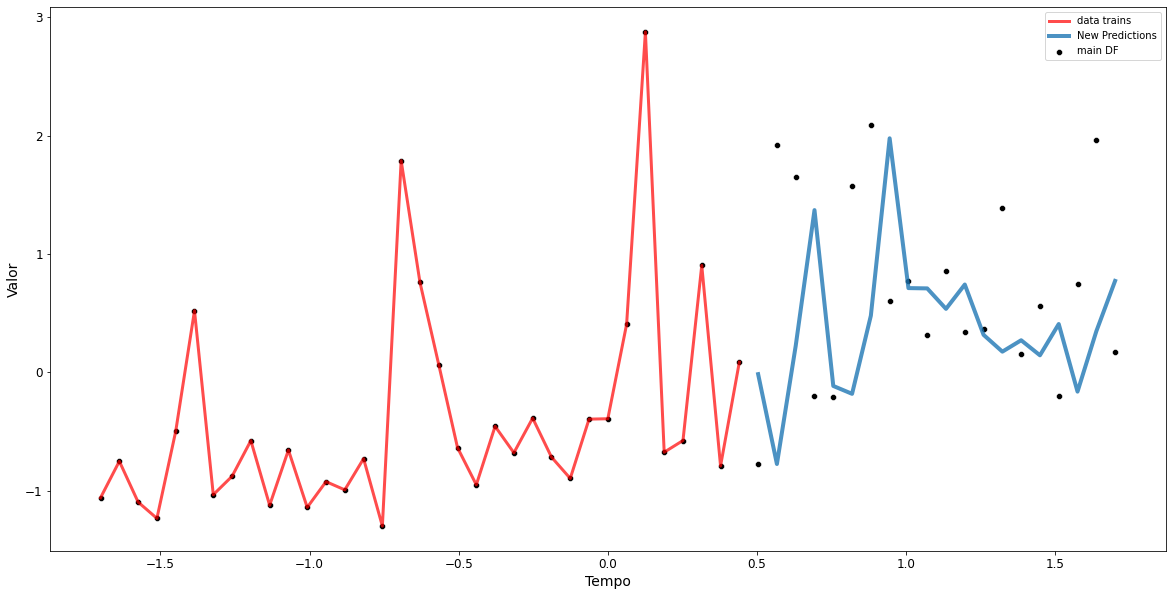

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(mainDF['data'], mainDF['valorTotal'], label="main DF",color='black')
plt.plot(XtreinoSVR, YtreinoSVR, 'r-', label="data trains",linewidth=3.0,alpha=0.7)
plt.plot(X, yNewPredictsSVR, '-', label="New Predictions",linewidth=4.0,alpha=0.8)
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend(loc='best')
plt.show()

# MLP


In [ ]:
mainDF.tail()

,valorTotal,data
50,0.561973,1.448864
51,-0.195920,1.511858
52,0.749708,1.574852
53,1.962152,1.637846
54,0.175162,1.700840


In [ ]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size = 0.7
valid_size=0.0

train_index = int(len(mainDF)*train_size)

# First we need to sort the dataset by the desired column
mainDF.sort_values(by = 'data', ascending=True, inplace=True)

df_train = mainDF[0:train_index]
df_rem = mainDF[train_index:]

valid_index = int(len(mainDF)*valid_size)

df_valid = mainDF[train_index:train_index+valid_index]
df_test = mainDF[train_index+valid_index:]

X_train, y_train = df_train['data'].copy(), df_train['valorTotal'].copy()
X_valid, y_valid = df_valid['data'].copy(), df_valid['valorTotal'].copy()
X_test, y_test = df_test['data'].copy(), df_test['valorTotal'].copy()

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(38,)
(38,)
(0,)
(0,)
(17,)
(17,)


(None, None)

In [ ]:
y = mainDF['valorTotal']
x = mainDF['data']
#Grava o X_test para printar no grafico!
X = X_test
XtreinoMLP = X_train
YtreinoMLP = y_train

contador = 0
yNewPredictsMLP = np.array([])
tamanhoFinal = len(X_test)
y_pred = ''

In [ ]:
while(contador < tamanhoFinal):
    #pegar de 3 em 3 amostras de teste.
    testar = X_test[contador:contador+1]

    #MLP
   # np.random.seed(10)
    #tf.random.set_seed(10)

    MLPmodel = keras.models.Sequential([
              keras.layers.Dense(3, activation="relu"),
              keras.layers.Dense(3, activation="relu"),
              keras.layers.Dense(1)
              ])

    MLPmodel.compile(loss="mean_squared_error",
                    optimizer="sgd",
                    metrics=["accuracy"])


    history = MLPmodel.fit(X_train, y_train, epochs=20,
                          validation_data=(X_valid, y_valid))

    mse_test = MLPmodel.evaluate(X_test, y_test)
    y_pred = MLPmodel.predict(testar)

    yNewPredictsMLP = np.concatenate ((yNewPredictsMLP,(np.array(y_pred).reshape(1))), axis=0)

    novas = len(X_train) + 1

    X_train = x[:novas]
    y_train = y[:novas]

    contador = contador+1

Epoch 1/20
2/2 [==============================] - 0s 51ms/step - loss: 0.7648 - accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 24ms/step - loss: 0.7638 - accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 21ms/step - loss: 0.7643 - accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 21ms/step - loss: 0.7631 - accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 22ms/step - loss: 0.7635 - accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 20ms/step - loss: 0.7628 - accuracy: 0.0000e+00
Epoch 7/20
2/2 [==============================] - 0s 20ms/step - loss: 0.7605 - accuracy: 0.0000e+00
Epoch 8/20
2/2 [==============================] - 0s 20ms/step - loss: 0.7538 - accuracy: 0.0000e+00
Epoch 9/20
2/2 [==============================] - 0s 22ms/step - loss: 0.7515 - accuracy: 0.0000e+00
Epoch 10/20
2/2 [==============================] - 0s 23ms/step - loss: 0.7517 - accuracy: 

1/1 [==============================] - 0s 50ms/step
Epoch 1/20
2/2 [==============================] - 0s 50ms/step - loss: 1.4212 - accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 20ms/step - loss: 1.3451 - accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 22ms/step - loss: 1.2783 - accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 24ms/step - loss: 1.2233 - accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 21ms/step - loss: 1.1829 - accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 24ms/step - loss: 1.1499 - accuracy: 0.0000e+00
Epoch 7/20
2/2 [==============================] - 0s 22ms/step - loss: 1.1184 - accuracy: 0.0000e+00
Epoch 8/20
2/2 [==============================] - 0s 22ms/step - loss: 1.0975 - accuracy: 0.0000e+00
Epoch 9/20
2/2 [==============================] - 0s 26ms/step - loss: 1.0782 - accuracy: 0.0000e+00
Epoch 10/20
2/2 [======================

1/1 [==============================] - 0s 50ms/step
Epoch 1/20
2/2 [==============================] - 0s 60ms/step - loss: 1.0492 - accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 0s 24ms/step - loss: 1.0324 - accuracy: 0.0000e+00
Epoch 3/20
2/2 [==============================] - 0s 22ms/step - loss: 1.0137 - accuracy: 0.0000e+00
Epoch 4/20
2/2 [==============================] - 0s 21ms/step - loss: 0.9970 - accuracy: 0.0000e+00
Epoch 5/20
2/2 [==============================] - 0s 22ms/step - loss: 0.9809 - accuracy: 0.0000e+00
Epoch 6/20
2/2 [==============================] - 0s 21ms/step - loss: 0.9659 - accuracy: 0.0000e+00
Epoch 7/20
2/2 [==============================] - 0s 20ms/step - loss: 0.9513 - accuracy: 0.0000e+00
Epoch 8/20
2/2 [==============================] - 0s 22ms/step - loss: 0.9412 - accuracy: 0.0000e+00
Epoch 9/20
2/2 [==============================] - 0s 23ms/step - loss: 0.9310 - accuracy: 0.0000e+00
Epoch 10/20
2/2 [======================

In [ ]:
len(yNewPredictsMLP)

17

In [ ]:
type(yNewPredictsMLP)

numpy.ndarray

In [ ]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, yNewPredictsMLP)
print(r2_score)

-0.95651221250209


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, yNewPredictsMLP)

1.0687674822758808

In [ ]:
y_test = np.array(y_test)

In [ ]:
# Get SMAPE for pandas series as parameters
calculate_smape(y_test, yNewPredictsMLP)

135.54

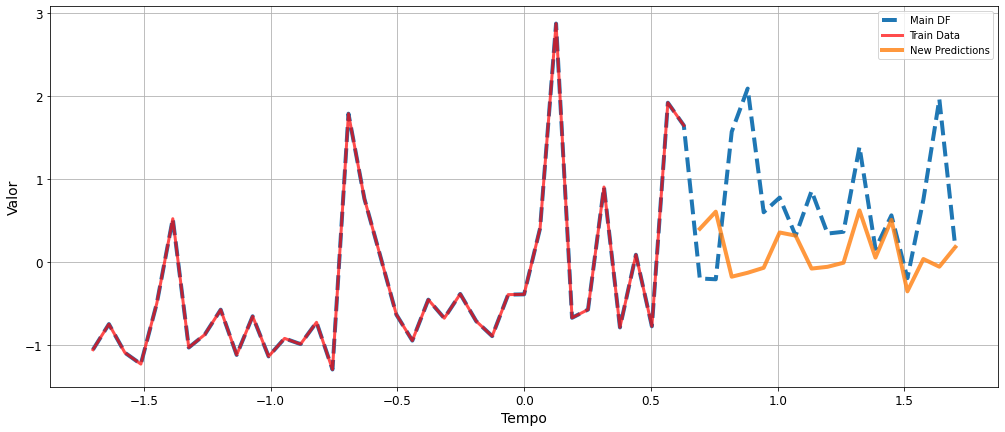

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(mainDF['data'], mainDF['valorTotal'], '--', label="Main DF",linewidth=4.0)
plt.plot(XtreinoMLP, YtreinoMLP, 'r-', label="Train Data",linewidth=3.0,alpha=0.7)
plt.plot(X, yNewPredictsMLP, '-', label="New Predictions",linewidth=4.0,alpha=0.8)
#plt.plot(X_valid,y_valid, '-', label="Data Validation",linewidth=4.0,alpha=0.8)
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend(loc='best')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


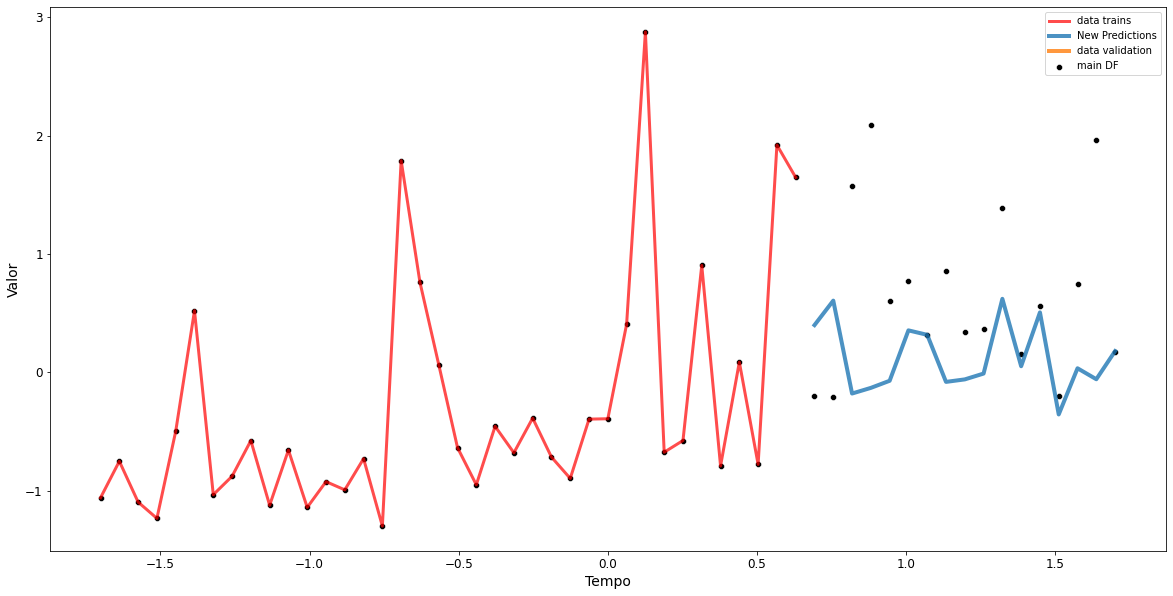

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(XtreinoMLP, YtreinoMLP, 'r-', label="data trains",linewidth=3.0,alpha=0.7)
plt.plot(X, yNewPredictsMLP, '-', label="New Predictions",linewidth=4.0,alpha=0.8)
plt.plot(X_valid,y_valid, '-', label="data validation",linewidth=4.0,alpha=0.8)
sns.scatterplot(mainDF['data'], mainDF['valorTotal'], label="main DF",color='black')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend(loc='best')
plt.show()

# RNN


In [ ]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size = 0.70
valid_size=0.0

train_index = int(len(mainDF)*train_size)

# First we need to sort the dataset by the desired column
mainDF.sort_values(by = 'data', ascending=True, inplace=True)

df_train = mainDF[0:train_index]
df_rem = mainDF[train_index:]

valid_index = int(len(mainDF)*valid_size)

df_valid = mainDF[train_index:train_index+valid_index]
df_test = mainDF[train_index+valid_index:]

X_train, y_train = df_train['data'].copy(), df_train['valorTotal'].copy()
X_valid, y_valid = df_valid['data'].copy(), df_valid['valorTotal'].copy()
X_test, y_test = df_test['data'].copy(), df_test['valorTotal'].copy()

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(38,)
(38,)
(0,)
(0,)
(17,)
(17,)


(None, None)

In [ ]:
y = mainDF['valorTotal']
x = mainDF['data']
#Grava o X_test para printar no grafico!
X = X_test
XtreinoRNN = X_train
YtreinoRNN = y_train

contador = 0
yNewPredictsRNN = np.array([])
tamanhoFinal = len(X_test)
y_pred = ''

DEEP RNN

In [ ]:

while(contador < tamanhoFinal):
    #pegar de 3 em 3 amostras de teste.
    testar = X_test[contador:contador+1]

    #RNN
 #   np.random.seed(42)
 #   tf.random.set_seed(42)

    model = keras.models.Sequential([
        keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
        keras.layers.SimpleRNN(20, return_sequences=True),
        keras.layers.Dense(1)
    ])

    model.compile(loss="mse", optimizer="adam")
    history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid))


    y_pred = model.predict(testar)

    yNewPredictsRNN = np.concatenate((yNewPredictsRNN,(np.array(y_pred).reshape(1))), axis=0)

    novas = len(X_train) + 1

    X_train = x[:novas]
    y_train = y[:novas]

    contador = contador+1

Epoch 1/5
2/2 [==============================] - 2s 55ms/step - loss: 0.7884
Epoch 2/5
2/2 [==============================] - 0s 23ms/step - loss: 0.7733
Epoch 3/5
2/2 [==============================] - 0s 25ms/step - loss: 0.7642
Epoch 4/5
2/2 [==============================] - 0s 32ms/step - loss: 0.7569
Epoch 5/5
1/1 [==============================] - 0s 316ms/step
Epoch 1/5
2/2 [==============================] - 3s 58ms/step - loss: 1.1551
Epoch 2/5
2/2 [==============================] - 0s 25ms/step - loss: 1.0683
Epoch 3/5
2/2 [==============================] - 0s 25ms/step - loss: 0.9945
Epoch 4/5
2/2 [==============================] - 0s 25ms/step - loss: 0.9301
Epoch 5/5
1/1 [==============================] - 0s 319ms/step
Epoch 1/5
2/2 [==============================] - 2s 56ms/step - loss: 1.0419
Epoch 2/5
2/2 [==============================] - 0s 25ms/step - loss: 0.9879
Epoch 3/5
2/2 [==============================] - 0s 30ms/step - loss: 0.9332
Epoch 4/5
2/2 [============

SIMPLE RNN

In [ ]:
#while(contador < tamanhoFinal):
    #pegar de 3 em 3 amostras de teste.
 #   testar = X_test[contador:contador+1]

    #RNN
    #np.random.seed(7)
    #tf.random.set_seed(7)

  #  model = keras.models.Sequential([
  #      keras.layers.SimpleRNN(1, input_shape=[None, 1])
  #  ])

   # optimizer = keras.optimizers.Adam(learning_rate=0.005)
   # model.compile(loss="mse", optimizer=optimizer)
   # history = model.fit(X_train, y_train, epochs=20)


   # y_pred = model.predict(testar)

  #  yNewPredictsRNN = np.concatenate((yNewPredictsRNN,(np.array(y_pred).reshape(1))), axis=0)

  #  novas = len(X_train) + 1

  #  X_train = x[:novas]
   # y_train = y[:novas]
   #
   # contador = contador+1

In [ ]:
#model.evaluate(X_valid, y_valid)

In [ ]:
#plot_learning_curves(history.history["loss"], history.history["val_loss"])
#plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, yNewPredictsRNN)
print(r2_score)

-0.6846155304349497


In [ ]:
len(yNewPredictsRNN)

17

In [ ]:
y_test = np.array(y_test)

In [ ]:
# Define the function to return the SMAPE value
def calculate_smape(actual, predicted) -> float:

    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)

    return round(
        np.mean(
            np.abs(predicted - actual) /
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )

In [ ]:
# Get SMAPE for pandas series as parameters
calculate_smape(y_test, yNewPredictsRNN)

137.55

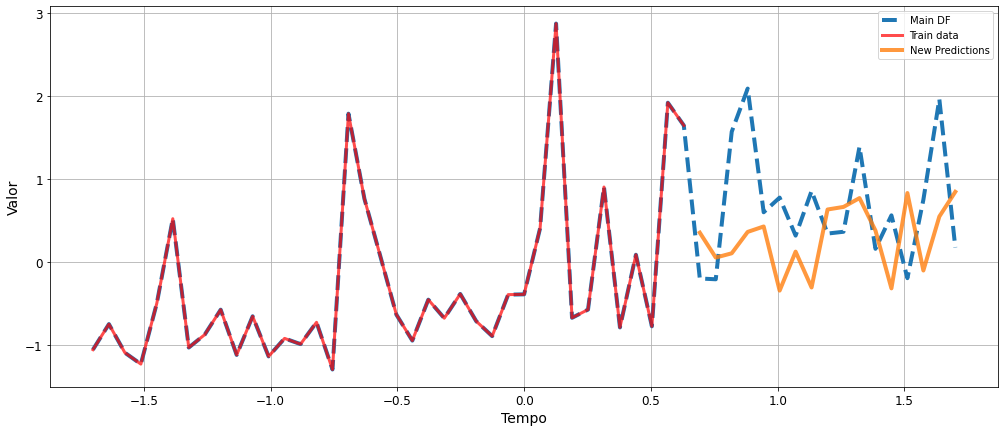

In [ ]:
plt.figure(figsize=(17,7))
plt.plot(mainDF['data'], mainDF['valorTotal'], '--', label="Main DF",linewidth=4.0)
plt.plot(XtreinoRNN, YtreinoRNN, 'r-', label="Train data",linewidth=3.0,alpha=0.7)
plt.plot(X, yNewPredictsRNN, '-', label="New Predictions",linewidth=4.0,alpha=0.8)
#plt.plot(X_valid,y_valid, '-', label="data validation",linewidth=4.0,alpha=0.8)
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend(loc='best')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


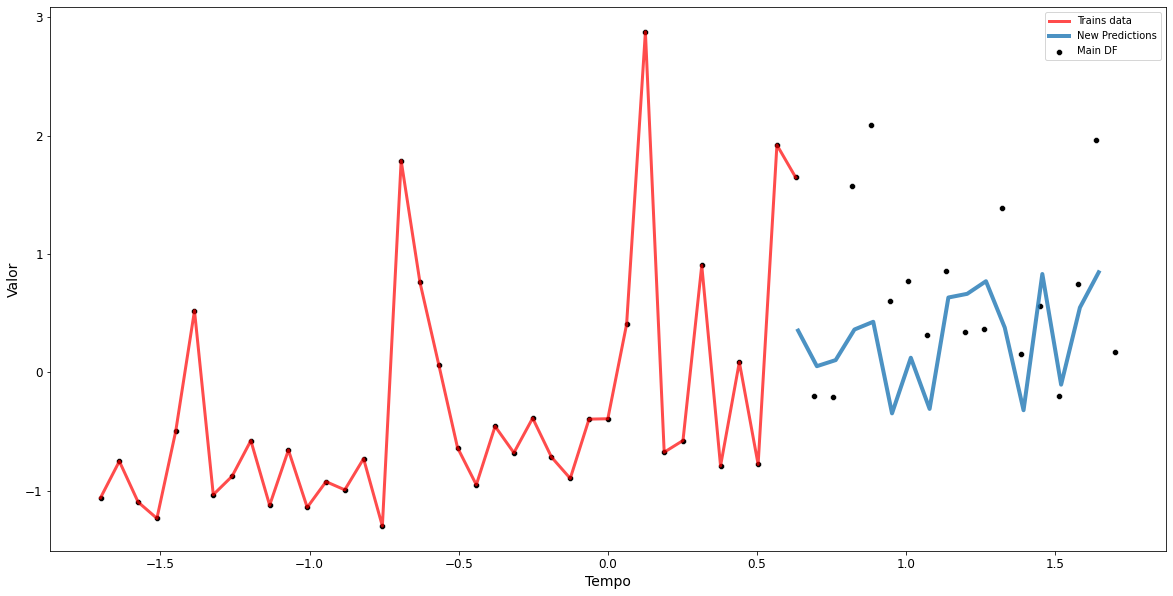

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(XtreinoRNN, YtreinoRNN, 'r-', label="Trains data",linewidth=3.0,alpha=0.7)
plt.plot(X-0.055, yNewPredictsRNN, '-', label="New Predictions",linewidth=4.0,alpha=0.8)
#plt.plot(X_valid,y_valid, '-', label="data validation",linewidth=4.0,alpha=0.8)
sns.scatterplot(mainDF['data'], mainDF['valorTotal'], label="Main DF",color='black')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend(loc='best')
plt.show()

#LSTM

https://towardsdatascience.com/time-series-prediction-with-lstm-in-tensorflow-42104db39340

In [ ]:
y = mainDF['valorTotal']
x = mainDF['data']

In [ ]:
mainDF

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    """Helper function to plot our time series"""
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

In [ ]:
class G:
    TIME,SERIES = x,y
    SPLIT_TIME = 38 # on day 1100 the training period will end. The rest will belong to the validation set
    WINDOW_SIZE = 20 # how many data points will we take into account to make our prediction
    BATCH_SIZE = 10 # how many items will we supply per batch
    SHUFFLE_BUFFER_SIZE = 54 # we need this parameter to define the Tensorflow sample buffer

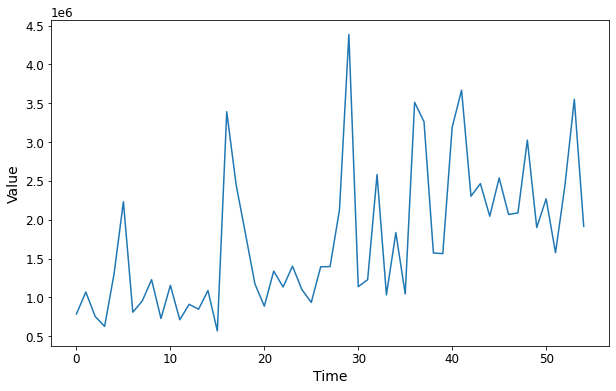

In [ ]:
# plot the series
plt.figure(figsize=(10, 6))
plot_series(G.TIME, G.SERIES)
plt.show()

In [ ]:
def train_val_split(time, series, time_step=G.SPLIT_TIME):
	"""Divide the time series into training and validation set"""
	time_train = time[:time_step]
	series_train = series[:time_step]
	time_valid = time[time_step:]
	series_valid = series[time_step:]

	return time_train, series_train, time_valid, series_valid

def windowed_dataset(series, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE):
	"""
	We create time windows to create X and y features.
	For example, if we choose a window of 30, we will create a dataset formed by 30 points as X
	"""
	dataset = tf.data.Dataset.from_tensor_slices(series)
	dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
	dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
	dataset = dataset.shuffle(shuffle_buffer)
	dataset = dataset.map(lambda window: (window[:-1], window[-1]))
	dataset = dataset.batch(batch_size).prefetch(1)
	return dataset

In [ ]:
# let's create the dataset with time windows
#dataset = windowed_dataset(series_train)

# we divide into training and validation set
time_train, series_train, time_valid, series_valid = train_val_split(G.TIME, G.SERIES)

In [ ]:
def create_uncompiled_model():
  # define a sequential model
  model = tf.keras.models.Sequential([
      tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                    input_shape=[None]),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1024, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
      tf.keras.layers.Dense(1),
  ])

  return model

In [ ]:
class EarlyStopping(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):

    if(logs.get('mae') < 0.03):
      print("\nMAEthreshold reached. Training stopped.")
      self.model.stop_training = True

# Let's create an object of our class and assign it to a variable
early_stopping = EarlyStopping()

In [ ]:
def create_model():
    tf.random.set_seed(51)

    model = create_uncompiled_model()

    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["mae"])
    return model

model = create_model()

# we train for 20 epochs with and assign the callback
history = model.fit(time_train, series_train, epochs=20, callbacks=[early_stopping])

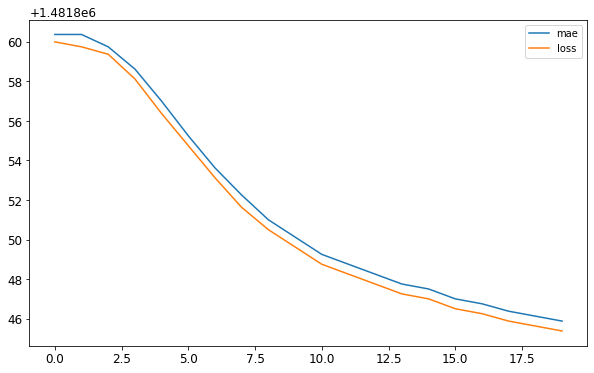

In [ ]:
# plot MAE and loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

In [ ]:
def compute_metrics(true_series, forecast):
    """Helper to print MSE and MAE"""
    mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
    mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()

    return mse, mae



In [ ]:
def model_forecast(model, series, window_size):

    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

2/2 [==============================] - 5s 287ms/step


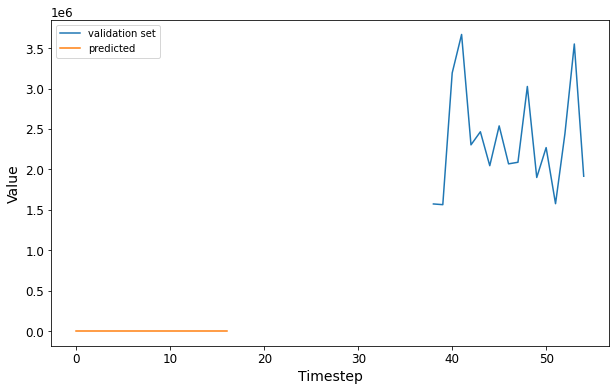

In [ ]:
# Prediction on the whole series
all_forecast = model_forecast(model, G.SERIES, G.WINDOW_SIZE).squeeze()

# Validation portion
val_forecast = all_forecast[G.SPLIT_TIME - G.WINDOW_SIZE:-1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(series_valid, label="validation set")
plt.plot(val_forecast, label="predicted")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend()
plt.show()